In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Markdown
import seaborn as sns

In [44]:
data_inactivity = pd.read_csv('inactivity.csv', usecols=['FIPS', '% INACTIVE']) #FIPDS
data_obesity = pd.read_csv('obesity.csv', usecols=['FIPS', '% OBESE'])
data_diabetes = pd.read_csv('diabetes.csv', usecols=['FIPS', '% DIABETIC',])

inac_ob = pd.merge(data_inactivity, data_obesity, on='FIPS', how='inner')

common_dataset = pd.merge(inac_ob, data_diabetes, on='FIPS', how='inner')

font_size_text = "<h2>**5 Point Summary**</h2>"
display(Markdown(font_size_text))

common_dataset


<h2>**5 Point Summary**</h2>

,FIPS,% INACTIVE,% OBESE,% DIABETIC
0,1011,17.0,18.7,9.4
1,2068,16.2,18.9,6.8
2,2105,15.0,19.4,7.3
3,2195,17.8,17.2,9.2
4,2230,15.8,18.3,6.6
...,...,...,...,...
349,51820,16.6,19.5,8.6
350,51830,15.7,18.0,8.5
351,51840,16.1,19.4,6.9
352,53055,11.9,19.3,4.5


In [45]:
obes_data = np.sqrt(data_obesity.iloc[:, 1]).values #sqrt transformed array of obesity
diab_data = np.log(data_diabetes.iloc[:, 1]).values #log transformed diabetes data
inac_data = data_inactivity.iloc[:, 1].values #inacivity data

In [46]:
q1_inac = np.percentile(inac_data, 25)
q1_obes = np.percentile(obes_data, 25)
q1_diab = np.percentile(diab_data, 25)

median_inac = np.percentile(inac_data, 50)
median_obes = np.percentile(obes_data, 50)
median_diab = np.percentile(diab_data, 50)

q3_inac = np.percentile(inac_data, 75)
q3_obes = np.percentile(obes_data, 75)
q3_diab = np.percentile(diab_data, 75)

iqr_inac = q3_inac - q1_inac
iqr_obes = q3_obes - q1_obes
iqr_diab = q3_diab - q1_diab

lower_bound_inac = q1_inac - 1.5 * iqr_inac
lower_bound_obes = q1_obes - 1.5 * iqr_obes
lower_bound_diab = q1_diab - 1.5 * iqr_diab

upper_bound_inac = q1_inac + 1.5 * iqr_inac
upper_bound_obes = q1_obes + 1.5 * iqr_obes
upper_bound_diab = q1_diab + 1.5 * iqr_diab

for i in ["inac","obes", "diab"]:
    print('\n')
    print("First Quartile for " + i + "\t :", locals()[f"q1_{i}"])
    print("Median for " + i + "\t :", locals()[f"median_{i}"])
    print("Third Quartile for " + i+ "\t :", locals()[f"q3_{i}"])
    print("IQR for " + i+ "\t :", locals()[f"iqr_{i}"])
    print("Lowerbound for " + i+ "\t :", locals()[f"lower_bound_{i}"])
    print("Upper bound for " + i+ "\t :", locals()[f"upper_bound_{i}"])



First Quartile for inac	 : 15.0
Median for inac	 : 16.7
Third Quartile for inac	 : 18.1
IQR for inac	 : 3.1000000000000014
Lowerbound for inac	 : 10.349999999999998
Upper bound for inac	 : 19.650000000000002


First Quartile for obes	 : 4.230839160261236
Median for obes	 : 4.277849927241488
Third Quartile for obes	 : 4.358898943540674
IQR for obes	 : 0.12805978327943812
Lowerbound for obes	 : 4.038749485342079
Upper bound for obes	 : 4.422928835180393


First Quartile for diab	 : 1.9878743481543455
Median for diab	 : 2.128231705849268
Third Quartile for diab	 : 2.272125885509337
IQR for diab	 : 0.2842515373549914
Lowerbound for diab	 : 1.5614970421218584
Upper bound for diab	 : 2.414251654186833


In [47]:
inac_column = common_dataset.iloc[:, 1]  # Extracting the inactivity percentage column
obes_column = np.sqrt(common_dataset.iloc[:, 2])
diab_column = np.log(common_dataset.iloc[:, 3])

# Find outliers indices
outliers_inac = (inac_column < lower_bound_inac) | (inac_column > upper_bound_inac)
outliers_obes = (obes_column < lower_bound_obes) | (obes_column > upper_bound_obes)
outliers_diab = (diab_column < lower_bound_diab) | (diab_column > upper_bound_diab)

all_outliers = outliers_inac | outliers_obes | outliers_diab
# Remove outliers
filtered_dataset = common_dataset.loc[~all_outliers]


In [66]:
X = filtered_dataset.iloc[:, 1:-1].values
y = filtered_dataset.iloc[:, -1].values

/Users/snehsuresh/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/snehsuresh/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/snehsuresh/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/snehsuresh/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

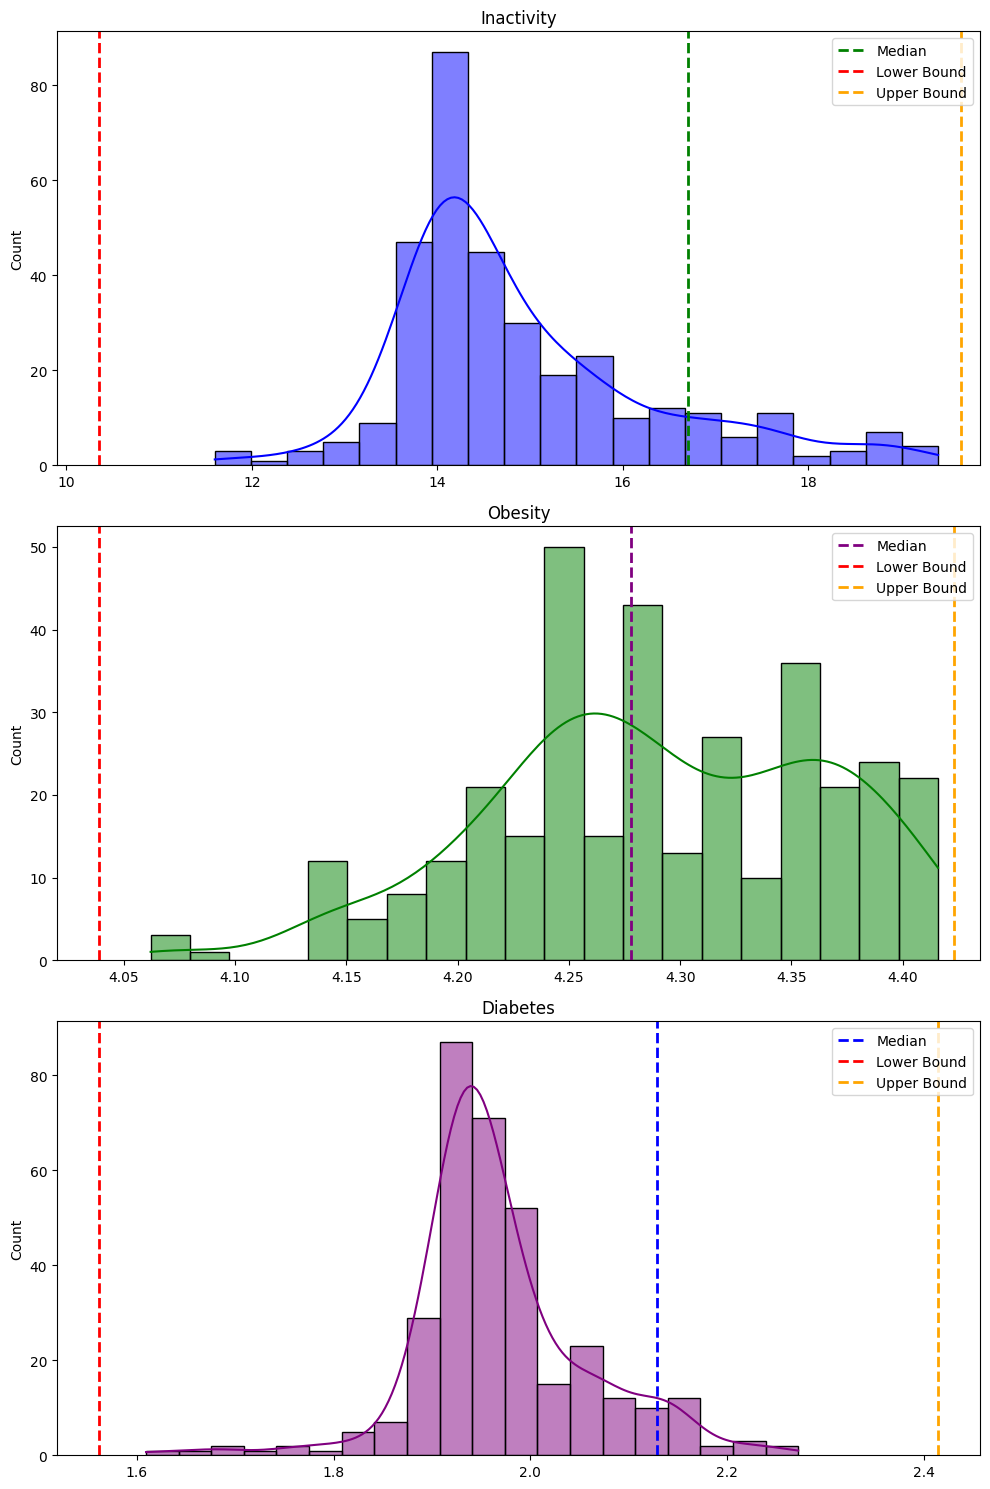

In [67]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot histograms with KDE for inactivity
sns.histplot(filtered_dataset.iloc[:, 1].values, bins=20, kde=True, color='blue', ax=axes[0])
axes[0].axvline(median_inac, color='green', linestyle='dashed', linewidth=2, label='Median')
axes[0].axvline(lower_bound_inac, color='red', linestyle='dashed', linewidth=2, label='Lower Bound')
axes[0].axvline(upper_bound_inac, color='orange', linestyle='dashed', linewidth=2, label='Upper Bound')
axes[0].set_title('Inactivity')
axes[0].legend()

# Plot histograms with KDE for obesity
sns.histplot(np.sqrt(filtered_dataset.iloc[:, 2]).values, bins=20, kde=True, color='green', ax=axes[1])
axes[1].axvline(median_obes, color='purple', linestyle='dashed', linewidth=2, label='Median')
axes[1].axvline(lower_bound_obes, color='red', linestyle='dashed', linewidth=2, label='Lower Bound')
axes[1].axvline(upper_bound_obes, color='orange', linestyle='dashed', linewidth=2, label='Upper Bound')
axes[1].set_title('Obesity')
axes[1].legend()

# Plot histograms with KDE for diabetes
sns.histplot(np.log(filtered_dataset.iloc[:, -1]).values, bins=20, kde=True, color='purple', ax=axes[2])
axes[2].axvline(median_diab, color='blue', linestyle='dashed', linewidth=2, label='Median')
axes[2].axvline(lower_bound_diab, color='red', linestyle='dashed', linewidth=2, label='Lower Bound')
axes[2].axvline(upper_bound_diab, color='orange', linestyle='dashed', linewidth=2, label='Upper Bound')
axes[2].set_title('Diabetes')
axes[2].legend()

# Display the plots
plt.tight_layout()
plt.show()

In [68]:

#Check if data is normal
from scipy.stats import shapiro
from scipy.stats import boxcox

X = filtered_dataset.iloc[:, 1:-1].values
y = filtered_dataset.iloc[:, -1].values

# Assuming 'inactivity_percentage' is the column of interest
data1 = data_inactivity[ '% INACTIVE']
data2 = data_obesity[ '% OBESE']
data3 = data_diabetes[ '% DIABETIC']

# Shapiro-Wilk test for normality
stat, p_value = shapiro(data3)
print(p_value)
# Check the p-value
if p_value > 0.05:
    print("The data appears to be normally distributed.")
else:
    print("The data does not appear to be normally distributed.")

1.348526384579359e-33
The data does not appear to be normally distributed.


In [69]:
# X = filtered_dataset.iloc[:, 1:-1].values
# y = filtered_dataset.iloc[:, -1].values

X = filtered_dataset.iloc[:, 1:-1].values
X[:, 1] = np.sqrt(X[:, 1])
y = np.log(filtered_dataset.iloc[:, -1].values)


In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [61]:
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

huber_reg = HuberRegressor(epsilon=1.35) 
huber_reg.fit(X_train_scaled, y_train)

y_pred_train = huber_reg.predict(X_train_scaled)
y_pred_test = huber_reg.predict(X_test_scaled)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f'Mean Squared Error on Training Set: {mse_train}')
print(f'Mean Squared Error on Testing Set: {mse_test}')


Mean Squared Error on Training Set: 0.006326841209459163
Mean Squared Error on Testing Set: 0.005031370702464273


In [62]:
print("Intercept:", huber_reg.intercept_)
print("Coefficient for Inactivity (B1):", huber_reg.coef_[0])
print("Coefficient for Obesity (B2):", huber_reg.coef_[1])

Intercept: 1.9632708046490581
Coefficient for Inactivity (B1): 0.031373084547056576
Coefficient for Obesity (B2): 0.0007981752240070371


In [63]:
# A 1% increase in inactivity is associated with an estimated increase of 0.032% in the Diabetes Rate, holding other variables constant.
# A 1% increase in obesity is associated with an estimated increase of 0.186% in the Diabetes Rate, holding other variables constant.

Text(0.5, 1.0, 'Actual vs Predicted Diabetes Percentage (Training Data)')

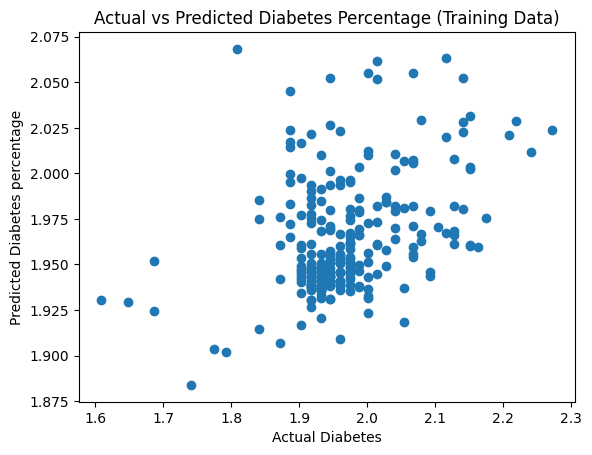

In [64]:
import matplotlib.pyplot as plt

plt.scatter(y_train, y_pred_train)
plt.xlabel("Actual Diabetes")
plt.ylabel("Predicted Diabetes percentage")
plt.title("Actual vs Predicted Diabetes Percentage (Training Data)")

In [65]:
from sklearn.metrics import r2_score
r2_score(y_train, y_pred_train)

0.1621339798535253

Text(0.5, 1.0, 'Actual vs Predicted Diabetes Percentage (Testing Data)')

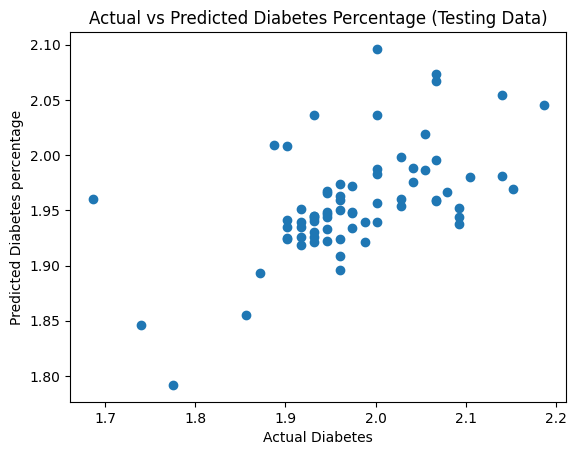

In [57]:
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual Diabetes")
plt.ylabel("Predicted Diabetes percentage")
plt.title("Actual vs Predicted Diabetes Percentage (Testing Data)")

In [58]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_test)

0.27803213466554877

/Users/snehsuresh/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/snehsuresh/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


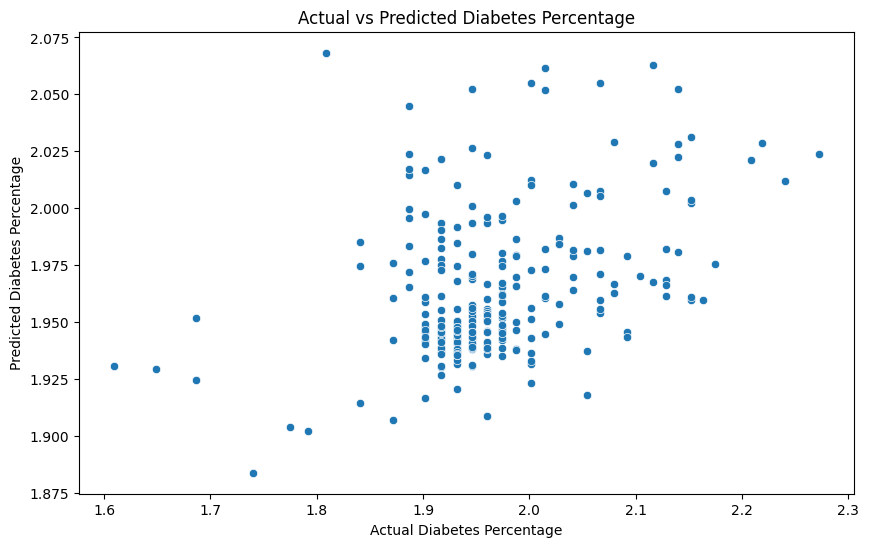

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train, y=y_pred_train)
plt.title('Actual vs Predicted Diabetes Percentage')
plt.xlabel('Actual Diabetes Percentage')
plt.ylabel('Predicted Diabetes Percentage')
plt.show()

/Users/snehsuresh/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/snehsuresh/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


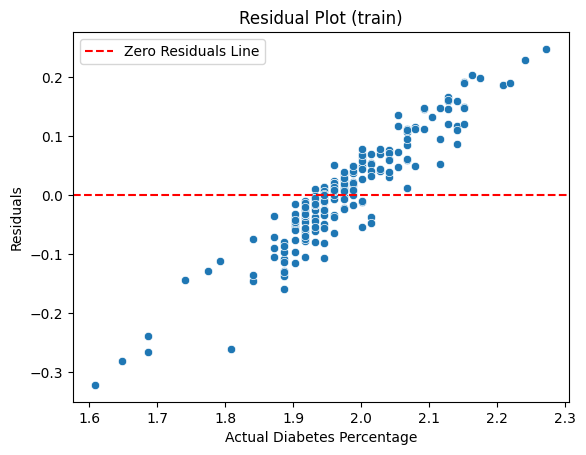

In [25]:
residuals = y_train - y_pred_train
sns.scatterplot(x=y_train, y=residuals)
plt.axhline(y=0, color='r', linestyle='--', label='Zero Residuals Line')
plt.title('Residual Plot (train)')
plt.xlabel('Actual Diabetes Percentage')
plt.ylabel('Residuals')
plt.legend()
plt.show()

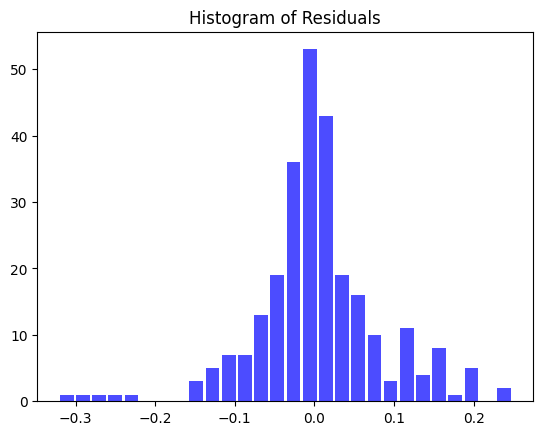

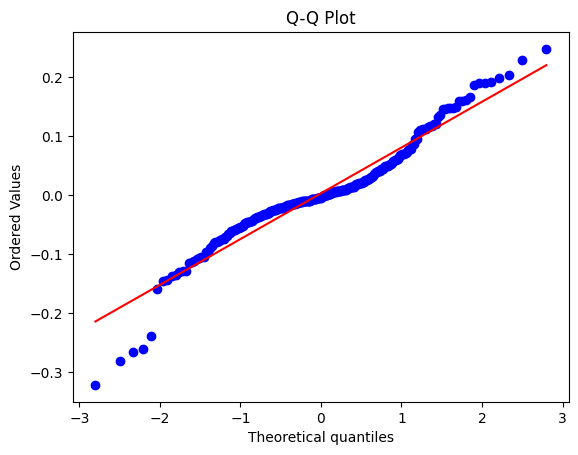

In [26]:
import scipy.stats as stats
plt.hist(residuals, bins='auto', color='blue', alpha=0.7, rwidth=0.85)
plt.title('Histogram of Residuals')
plt.show()

# Q-Q plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

In [27]:
from scipy.stats import shapiro

_, p_value = shapiro(residuals)
print("Shapiro-Wilk p-value:", p_value)
if p_value < 0.05:
    print("Not normal")
else:
    print("Normal")

Shapiro-Wilk p-value: 5.46102318921271e-09
Not normal


In [28]:
from scipy.stats import anderson

result = anderson(residuals)
print("Anderson-Darling statistic:", result.statistic)
print("Anderson-Darling critical values:", result.critical_values)

Anderson-Darling statistic: 5.554914753244134
Anderson-Darling critical values: [0.568 0.647 0.776 0.905 1.076]


/Users/snehsuresh/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/snehsuresh/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


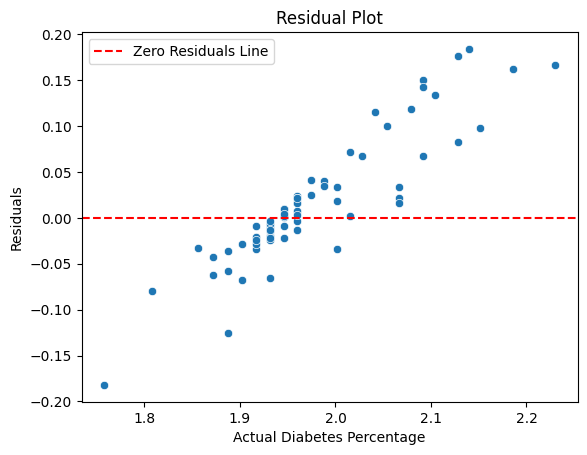

In [29]:
residuals_test = y_test - y_pred_test
sns.scatterplot(x=y_test, y=residuals_test)
plt.axhline(y=0, color='r', linestyle='--', label='Zero Residuals Line')
plt.title('Residual Plot')
plt.xlabel('Actual Diabetes Percentage')
plt.ylabel('Residuals')
plt.legend()
plt.show()


In [32]:
squared_residuals = residuals**2

In [33]:
squared_residuals_test = residuals_test**2

In [34]:
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm
# Add a constant term to X_train for the intercept
X_train_with_constant = sm.add_constant(X_train)

# Perform Breusch-Pagan test
_, p_value, _, _ = sm.stats.diagnostic.het_breuschpagan(squared_residuals, X_train_with_constant)

# Print the results
print("Breusch-Pagan Test Results:")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Heteroskedasticity detected (reject null hypothesis)")
else:
    print("No evidence of heteroskedasticity")

Breusch-Pagan Test Results:
P-value: 0.6275044341346525
No evidence of heteroskedasticity


In [35]:
# Add a constant term to X_train for the intercept
X_test_with_constant = sm.add_constant(X_test)

# Perform Breusch-Pagan test
_, p_value, _, _ = sm.stats.diagnostic.het_breuschpagan(squared_residuals_test, X_test_with_constant)

# Print the results
print("Breusch-Pagan Test Results:")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Heteroskedasticity detected (reject null hypothesis)")
else:
    print("No evidence of heteroskedasticity")

Breusch-Pagan Test Results:
P-value: 0.4003179453136175
No evidence of heteroskedasticity


In [36]:
from sklearn.linear_model import LinearRegression

# Assuming X_test contains the independent variables
squared_regressor = LinearRegression()
squared_regressor.fit(X_train, squared_residuals)

#Why are we testing if the squared residuals can be predicted by the independent variables?
# The Breusch-Pagan test tests the hypothesis that the variance of the errors (residuals) in a regression model is constant across all levels of the independent variables. In other words, it checks for homoskedasticity, which is one of the assumptions of classical linear regression.
#If the variance of the residuals is constant (homoskedasticity), it means that the spread of the residuals is the same across all values of the independent variables. This is a key assumption for the validity of OLS (Ordinary Least Squares) estimates and their associated statistical tests.

# Predict the squared residuals
squared_residuals_pred = squared_regressor.predict(X_train)

In [37]:
# Percent-Point Function (PPF):
# The Percent-Point Function, also known as the inverse cumulative distribution function (CDF), helps you find a specific value in a probability distribution. Imagine you have a probability, and you want to know the corresponding value in your distribution. The PPF gives you that value.

# For example, let's say you have a normal distribution (bell curve) of test scores, and you know that a score is at the 80th percentile. You can use the PPF to find the test score that corresponds to this percentile.

# Cumulative Distribution Function (CDF):
# The Cumulative Distribution Function gives you the probability that a random variable takes a value less than or equal to a given point. It's like adding up all the probabilities of values up to a certain point.

# Continuing with the test score example, if you want to know the probability that a student scored below a certain score, you would use the CDF. It's a way of understanding the cumulative probability up to a specific value in your distribution.

# In simpler terms, PPF helps you find a value based on a probability, while CDF gives you the probability up to a certain value. They're both tools to understand and work with probability distributions.







In [38]:
from sklearn.metrics import mean_squared_error
from scipy.stats import chi2


# Null Hypothesis (H0): There is no heteroskedasticity; the variance of the residuals is constant.

# The alternative hypothesis (what you are testing for) would be:

# Alternative Hypothesis (H1): There is heteroskedasticity; the variance of the residuals is not constant.

print(squared_residuals_pred)

test_statistic = len(X_test) * mean_squared_error(squared_residuals, squared_residuals_pred) / 2
# critical_value = chi2.ppf(0.95, df=1)

# if test_statistic > critical_value:
#     print("Heteroskedasticity detected (reject null hypothesis)")
# else:
#     print("No evidence of heteroskedasticity (fail to reject null hypothesis)")
    
# print(test_statistic)

# Calculate the p-value
p_value = 1 - chi2.cdf(test_statistic, df=1)

# Significance level (alpha)
alpha = 0.05

# Compare p-value to significance level
if p_value <= alpha:
    print(f"Heteroskedasticity detected (reject null hypothesis) with p-value: {p_value}")
else:
    print(f"No evidence of heteroskedasticity (fail to reject null hypothesis) with p-value: {p_value}")

print("Test Statistic:", test_statistic)


[ 0.00518318  0.00489844  0.00650616  0.00478291  0.0052713   0.00471697
  0.00710328  0.00899268  0.00414173  0.00505514  0.00498322  0.01371821
  0.0040847   0.01277256  0.00350732  0.00835827  0.00514935  0.00398919
  0.00480435  0.00480685  0.008885    0.00620716  0.00532517  0.01239908
  0.00754442  0.00600093  0.00952876  0.0090614   0.00451276  0.00552787
  0.0095024   0.00734151  0.00502735  0.0063467   0.00710342  0.01183884
  0.00985436  0.01060489  0.00956792  0.01161834  0.00590934  0.00814211
  0.00553344  0.00619493  0.00436222  0.00732392  0.00194852  0.00515796
  0.00515796  0.00363076  0.00700933  0.00535703  0.00341979  0.01338073
  0.00737923  0.00764779  0.00562417  0.00625148  0.0043052   0.00474218
  0.00710714  0.00364029  0.00609426  0.00987467  0.01333267  0.00536985
  0.00521227  0.00511894  0.00770798  0.00802443  0.00531294  0.0054444
  0.00459449  0.00474218  0.00496669  0.01356611  0.00929413  0.00727474
  0.00557753  0.00474218  0.00496268  0.00893164  0.

In [41]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cross_val_r2 = cross_val_score(huber_reg, X_train, y_train, cv=5, scoring='r2')
cross_val_r2

array([0.15608784, 0.04863847, 0.17068903, 0.15722794, 0.09960655])

In [42]:
cv_range = np.max(cross_val_r2) - np.min(cross_val_r2)
print("Range of R-squared: ", cv_range)
cv_std = np.std(cross_val_r2)
print("Standard Deviation of R-squared: ", cv_std)
q75, q25 = np.percentile(cross_val_r2, [75 ,25])
cv_iqr = q75 - q25
print("Interquartile Range of R-squared: ", cv_iqr)


Range of R-squared:  0.12205056361645472
Standard Deviation of R-squared:  0.04595210687848277
Interquartile Range of R-squared:  0.05762139205743366


In [ ]:
# If the range, standard deviation, or IQR is relatively small, it suggests that the model's performance is consistent across different folds.
# If the range, standard deviation, or IQR is large, it indicates a higher variance in performance, and the model may be sensitive to the choice of training data.